# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [160]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data   


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [161]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class RB_Node(Node):
    RED = True
    BLACK = False

    def __init__(self, value, colour):
        super().__init__(value)
        self.colour = colour

Use the cell below to implement the requested API by means of **sequential search**.

In [162]:
class SequentialSearchSet(AbstractSet):
    def __init__(self):
        self.set = []      

    def insertElement(self, element):
        inserted = False
        
#         self.set.append(element)
        
        if element not in self.set:
           self.set.append(element)
           inserted = True
        return inserted
    
    def searchElement(self, element):     
        found = False
        for member in self.set:
            if member == element:
                found = True
                break
        return found

Use the cell below to implement the requested API by means of **binary search tree**.

In [163]:
class BinarySearchTreeSet(AbstractSet):
    def __init__(self):
        self.root = None
    
    def insertElement(self, element):
        inserted = False
        if not self.root:
            self.root = Node(element)
            inserted = True
        else:
            current = self.root
            while current:
                if current.value == element:
                    inserted = False
                    break
                elif current.value > element:
                    if not current.left:
                        current.left = Node(element)
                        inserted = True
                        break
                    current = current.left
                elif current.value < element:
                    if not current.right:
                        current.right = Node(element)
                        inserted = True
                        break
                    current = current.right
        return inserted

    def searchElement(self, element):     
        found = False
        current = self.root
        while current:
            if current.value == element:
                found = True
                break
            elif current.value > element:
                current = current.left
            elif current.value < element:
                current = current.right
        return found

Use the cell below to implement the requested API by means of **balanced search tree**.

In [164]:
class BalancedSearchTreeSet(AbstractSet):
    def __init__(self):
        self.root = None

    @staticmethod
    def is_red(node):
        if node is None:
            return False
        return node.colour == RB_Node.RED

    @staticmethod
    def rotate_left(node):
        x = node.right
        node.right = x.left
        x.left = node
        x.colour = node.colour
        node.colour = RB_Node.RED
        return x

    @staticmethod
    def rotate_right(node):
        x = node.left
        node.left = x.right
        x.right = node
        x.colour = node.colour
        node.colour = RB_Node.RED
        return x

    @staticmethod
    def flip_colours(node):
        node.colour = RB_Node.RED
        node.left.colour = RB_Node.BLACK
        node.right.colour = RB_Node.BLACK
    
    def insertElement(self, element):
        self.root, inserted = self._insertElement(self.root, element)
        self.root.colour = RB_Node.BLACK
        return inserted
    
    def _insertElement(self, node, element):
        if node is None:
            return RB_Node(element, RB_Node.RED), True

        if element < node.value:
            node.left, inserted = self._insertElement(node.left, element)
        elif element > node.value:
            node.right, inserted = self._insertElement(node.right, element)
        else:
            return node, False
        
        if self.is_red(node.right) and not self.is_red(node.left):
            node = self.rotate_left(node)
        if self.is_red(node.left) and self.is_red(node.left.left):
            node = self.rotate_right(node)
        if self.is_red(node.left) and self.is_red(node.right):
            self.flip_colours(node)
        return node, inserted    

    def searchElement(self, element):     
        return self._searchElement(self.root, element) == element

    def _searchElement(self, node, element):
        if node is None:
            return False

        if element < node.value:
            return self._searchElement(node.left, element)
        elif element > node.value:
            return self._searchElement(node.right, element)
        else:
            return node.value   

Use the cell below to implement the requested API by means of **bloom filter**.

In [165]:
from bitarray import bitarray

EXPECTED_NUM_INSERTIONS = 500000
BITARRAY_SIZE = EXPECTED_NUM_INSERTIONS * 50
LN2 = 0.69314718056

class BloomFilterSet(AbstractSet):
    def __init__(self, size, num_hashes=3):
        self.size = size
        self.num_hashes = num_hashes
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)

    def _hash(self, element):
        hash_values = []
        for i in range(self.num_hashes):
            hash_value = hash(f'{element}{i}')
            hash_values.append(hash_value % self.size)
        return hash_values
    
    @staticmethod
    def optimise_k(m, n):
        return 1 + int(LN2 * (m / n))
        
    def insertElement(self, element):
        if self.searchElement(element) is False:
            hash_values = self._hash(element)
            for value in hash_values:
                self.bit_array[value] = 1
            return True
        else:
            return False
    
    def searchElement(self, element):     
        hash_values = self._hash(element)
        for value in hash_values:
            if not self.bit_array[value]:
                return False
        return True

Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [166]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    NUM_WORDS = 50000
    MIN_LENGTH = 1
    AV_LOW_LENGTH = 2
    AV_HIGH_LENGTH = 6
    MAX_LENGTH = 12
    CONSONANTS = 'bcdfghjklmnpqrstvwxyz'
    VOWELS = 'aeiou'
    
    def __init__(self):
        pass

    def generate_word(self, scarcity=0.05):
        limit = int(1 / scarcity)
        roulette = random.randint(0, int(1 / scarcity))
        if roulette == limit:
            length = random.randint(self.AV_LOW_LENGTH, self.AV_HIGH_LENGTH)
        else:
            length = random.randint(self.MIN_LENGTH, self.MAX_LENGTH)
        word = ''
        for i in range(length):
            if i % 2 == 1 or length == 1:
                word += random.choice(self.VOWELS)
            else:
                word += random.choice(self.CONSONANTS)
        return word      
        
    def generateData(self, size):     
        # ADD YOUR CODE HERE
        data = []
        for i in range(size):
            data.append(self.generate_word())

        return data   



Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [167]:
import timeit
import random
import string

def txt_to_list(file_path):
    with open(file_path, 'r') as f:
        content = f.read()
        if file_path == "test-search.txt":
            return content.split("\n")
        else:
            return content.split()

def average_search_time(search_from_file, search_words_file, search_function, operation_repeats=50, search_intervals=5):
    # words_to_search_from = txt_to_list(search_from_file)
    words_to_search_from = [(''.join(random.choice(string.ascii_lowercase) for i in range(10))) for _ in range(100000)]
    search_words = txt_to_list(search_words_file)

    insert_time = {}
    mean_search_time = {}
    list_len = []
    intervals = len(words_to_search_from)//search_intervals

    for func_name, search_func in search_funcs.items():
        print(func_name)
        insert_time[func_name] = {}
        mean_search_time[func_name] = {}
#         for each function, slowly increase list size while timing insert and search times
        for i, word in enumerate(words_to_search_from):
            insert_time[func_name][i] = timeit.timeit(lambda: search_func.insertElement(word), number=operation_repeats)
#             if len(search_func.set) % 1000 == 0:
#                 print(len(search_func.set), timeit.timeit(lambda: search_func.insertElement(word), number=operation_repeats))
            if i % intervals == 0:
                search_time = [timeit.timeit(lambda: search_func.searchElement(word), number=operation_repeats) for word in search_words]
                mean_search_time[func_name][i] = sum(search_time)/(operation_repeats*len(search_time))

#         print(f"Insert Time - {insert_time}")
        print(f"Mean Search Time - {mean_search_time}")
    return insert_time, mean_search_time

search_funcs = {"BST":BinarySearchTreeSet(), "BF":BloomFilterSet(BITARRAY_SIZE)}
# search_funcs = {"LS":SequentialSearchSet(), "BST":BinarySearchTreeSet(), "LLRBT":BalancedSearchTreeSet(), "BF":BloomFilterSet(BITARRAY_SIZE)}
# search_funcs = {"BST":BinarySearchTreeSet()}
insert_time, mean_search_time = average_search_time("test1-mobydick.txt", "test-search.txt", search_funcs, 1, 100)


BST
Mean Search Time - {'BST': {0: 3.383248465545817e-07, 1000: 1.7519206141865035e-06, 2000: 2.2002971899875123e-06, 3000: 1.6839998836176249e-06, 4000: 2.3557906521808936e-06, 5000: 2.618020303214157e-06, 6000: 2.6255095999158166e-06, 7000: 2.663159810237313e-06, 8000: 2.5647398406947287e-06, 9000: 2.002201834479945e-06, 10000: 2.7069562422367956e-06, 11000: 2.480366901673992e-06, 12000: 3.0306751045201896e-06, 13000: 2.568678523482191e-06, 14000: 3.1740902367671696e-06, 15000: 2.7175817303274067e-06, 16000: 2.5991229724925045e-06, 17000: 2.4585139034145057e-06, 18000: 2.152912095488143e-06, 19000: 3.613225305068452e-06, 20000: 2.8974146992309923e-06, 21000: 3.5727134672924876e-06, 22000: 3.3553725764275006e-06, 23000: 3.5713339457288386e-06, 24000: 2.555299359117421e-06, 25000: 2.9104716655020732e-06, 26000: 3.5196511232969136e-06, 27000: 2.7472148766877864e-06, 28000: 2.434163662998023e-06, 29000: 2.406777732860331e-06, 30000: 2.5533556504551013e-06, 31000: 2.771787320844692e-06, 3

In [227]:
def average_search_time_synthetic(search_words_file, search_funcs, operation_repeats=50, search_intervals=5):
    words_to_search_from = TestDataGenerator().generateData(10000)
    search_words = txt_to_list(search_words_file)

    insert_time_synthetic = {}
    mean_search_time_synthetic = {}
    intervals = len(words_to_search_from)//search_intervals

    for func_name, search_func in search_funcs.items():
        print(func_name)
        insert_time_synthetic[func_name] = {}
        mean_search_time_synthetic[func_name] = {}
#         for each function, slowly increase list size while timing insert and search times
        for i, word in enumerate(words_to_search_from):
            insert_time_synthetic[func_name][i] = timeit.timeit(lambda: search_func.insertElement(word), number=operation_repeats)
            if i % intervals == 0:
                search_time = [timeit.timeit(lambda: search_func.searchElement(word), number=operation_repeats) for word in search_words]
                mean_search_time_synthetic[func_name][i] = sum(search_time)/(operation_repeats*len(search_time))

        print(f"Insert Time - {insert_time_synthetic}")
        print(f"Mean Search Time - {mean_search_time_synthetic}")
    return insert_time_synthetic, mean_search_time_synthetic

search_funcs_synthetic = {"BST":BinarySearchTreeSet(), "LLRBT":BalancedSearchTreeSet(), "BF":BloomFilterSet(BITARRAY_SIZE)}
# search_funcs = {"LS":SequentialSearchSet(), "BST":BinarySearchTreeSet(), "LLRBT":BalancedSearchTreeSet(), "BF":BloomFilterSet(BITARRAY_SIZE)}
# search_funcs = {"BST":BinarySearchTreeSet()}
insert_time_synthetic, mean_search_time_synthetic = average_search_time("test-search.txt", search_funcs_synthetic, 50, 100)


BST
Insert Time - {'BST': {0: 4.033399454783648e-05, 1: 1.1667012586258352e-05, 2: 1.5124998753890395e-05, 3: 1.7958998796530068e-05, 4: 1.4542005374096334e-05, 5: 1.92909938050434e-05, 6: 2.154200046788901e-05, 7: 2.0457999198697507e-05, 8: 2.5375004042871296e-05, 9: 1.1167008779011667e-05, 10: 2.7832997147925198e-05, 11: 1.5874989912845194e-05, 12: 2.4082997697405517e-05, 13: 2.5165994884446263e-05, 14: 3.325000579934567e-05, 15: 2.274999860674143e-05, 16: 2.895800571423024e-05, 17: 2.9458009521476924e-05, 18: 3.2208001357503235e-05, 19: 3.295901115052402e-05, 20: 3.7833990063518286e-05, 21: 2.0417006453499198e-05, 22: 3.2625001040287316e-05, 23: 3.3499993151053786e-05, 24: 3.0915995012037456e-05, 25: 3.6958008422516286e-05, 26: 3.512500552460551e-05, 27: 3.0291004804894328e-05, 28: 3.399999695830047e-05, 29: 2.5000001187436283e-05, 30: 2.1458006813190877e-05, 31: 3.766600275412202e-05, 32: 3.658400964923203e-05, 33: 3.3249991247430444e-05, 34: 3.112500417046249e-05, 35: 3.8917001802

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [229]:
# Dictionary -> Pandas Dataframe
pd_insert_time = pd.DataFrame.from_dict(insert_time)
pd_search_time = pd.DataFrame.from_dict(mean_search_time)
pd_insert_time_synthetic = pd.DataFrame.from_dict(insert_time_synthetic)
pd_search_time_synthetic = pd.DataFrame.from_dict(mean_search_time_synthetic)

In [230]:
# moby_dick_insert_time = pd_insert_time.copy()
# moby_dick_search_time = pd_search_time.copy()

In [231]:
pd_insert_time_averaged = pd_insert_time.groupby(np.arange(len(pd_insert_time))//100).median()
pd_insert_time_synthetic_averaged = pd_insert_time_synthetic.groupby(np.arange(len(pd_insert_time_synthetic))//100).median()

In [232]:
pd_insert_time_averaged

,BST,BF
0,9.590003e-07,0.000002
1,1.416993e-06,0.000002
2,1.583001e-06,0.000002
3,1.624998e-06,0.000002
4,1.917004e-06,0.000002
...,...,...
95,4.207999e-06,0.000002
96,4.417001e-06,0.000002
97,4.520996e-06,0.000002
98,4.458503e-06,0.000002


In [233]:
pd_insert_time_synthetic_averaged

,BST,LLRBT,BF
0,0.000034,0.000137,0.000045
1,0.000044,0.000180,0.000044
2,0.000049,0.000208,0.000044
3,0.000048,0.000208,0.000044
4,0.000051,0.000237,0.000045
...,...,...,...
95,0.000075,0.000338,0.000045
96,0.000070,0.000340,0.000045
97,0.000072,0.000355,0.000046
98,0.000076,0.000344,0.000047


In [234]:
# pd_insert_time_BST_LLRBT_BF_dick = pd_insert_time

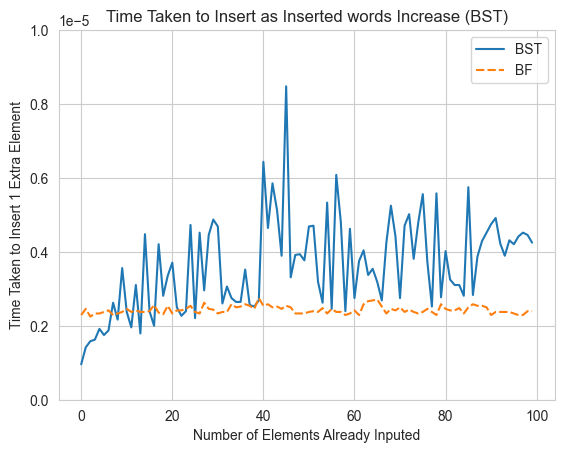

In [235]:
algo = 'BST'
upper_ylim = 0.00001
insert_graph = sns.lineplot(data=pd_insert_time_averaged)
insert_graph.set(ylim = [0, upper_ylim], title=f'Time Taken to Insert as Inserted words Increase ({algo})', xlabel='Number of Elements Already Inputed', ylabel='Time Taken to Insert 1 Extra Element')
plt.show()

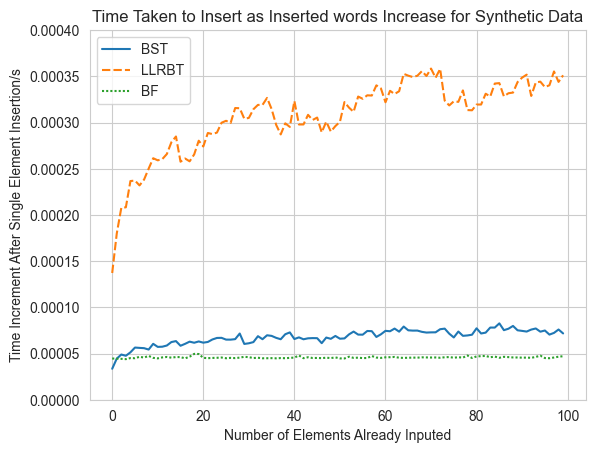

In [236]:
algo = 'BST'
upper_ylim = 0.0004
insert_graph = sns.lineplot(data=pd_insert_time_synthetic_averaged)
insert_graph.set(ylim = [0, upper_ylim], title=f'Time Taken to Insert as Inserted words Increase for Synthetic Data', xlabel='Number of Elements Already Inputed', ylabel='Time Increment After Single Element Insertion/s')
x = {i for i in range (0, 100)}

plt.show()

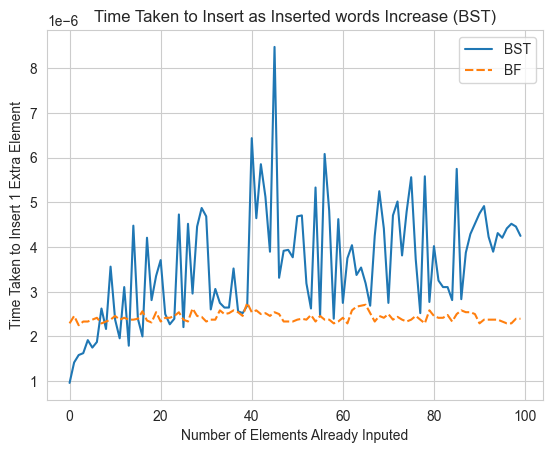

In [237]:
algo = 'BST'
upper_ylim = 0.00002
insert_graph = sns.lineplot(data=pd_insert_time_averaged)
insert_graph.set(title=f'Time Taken to Insert as Inserted words Increase ({algo})', xlabel='Number of Elements Already Inputed', ylabel='Time Taken to Insert 1 Extra Element')
plt.show()

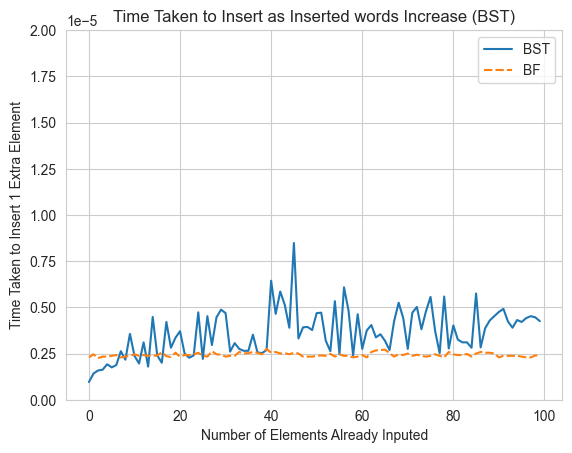

In [238]:
insert_graph = sns.lineplot(data=pd_insert_time_averaged)
insert_graph.set(ylim = [0, upper_ylim], title=f'Time Taken to Insert as Inserted words Increase ({algo})', xlabel='Number of Elements Already Inputed', ylabel='Time Taken to Insert 1 Extra Element')
plt.show()

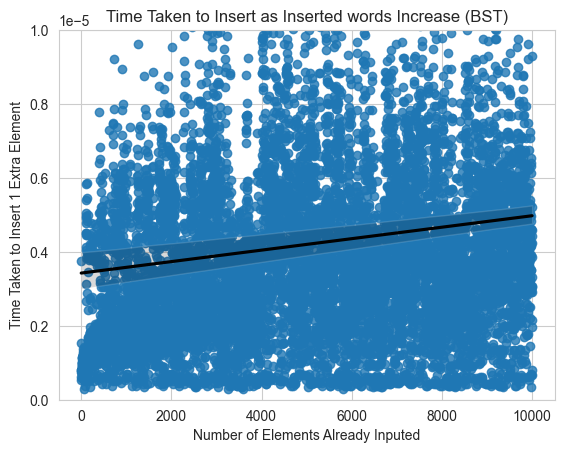

In [239]:
upper_ylim = 0.00001
insert_graph = sns.regplot(x=pd_insert_time.index, y=pd_insert_time[algo], line_kws={"color": "black"})
insert_graph.set(ylim = [0, upper_ylim], title=f'Time Taken to Insert as Inserted words Increase ({algo})', xlabel='Number of Elements Already Inputed', ylabel='Time Taken to Insert 1 Extra Element')
plt.show()

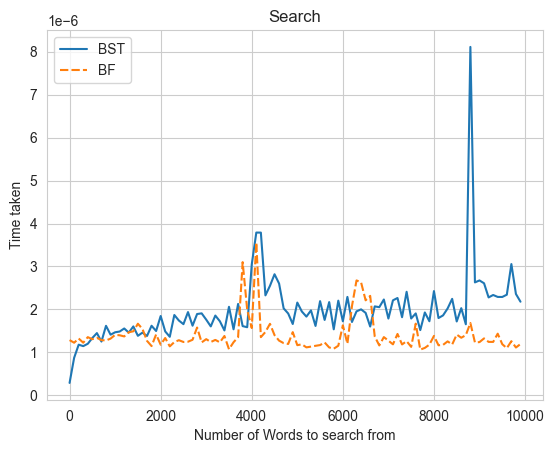

In [240]:
search_graph = sns.lineplot(data=pd_search_time)
search_graph.set(title='Search', xlabel='Number of Words to search from', ylabel='Time taken')
plt.show()

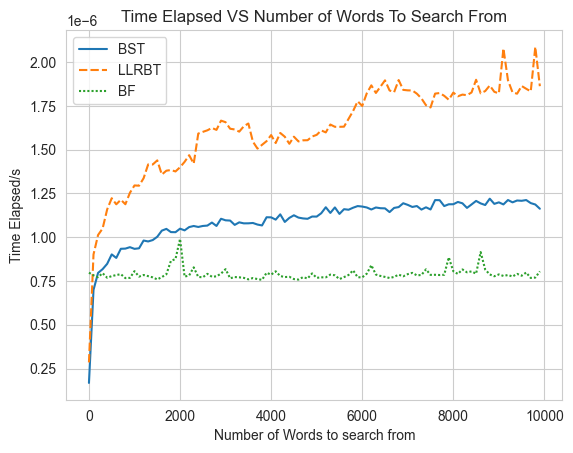

In [241]:
search_graph = sns.lineplot(data=pd_search_time_synthetic)
search_graph.set(title='Time Elapsed VS Number of Words To Search From', xlabel='Number of Words to search from', ylabel='Time Elapsed/s')
plt.show()